# EDA: asylum_seekers.csv 


Dieses Notebook gibt einen Überblick über den Datensatz asylum_seekers.csv (jährliche Asylverfahren).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = "../archive/asylum_seekers.csv"  

df = pd.read_csv(csv_path)
df.head()

C:\Users\paulk\AppData\Local\Temp\ipykernel_43312\3171204098.py:7: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,Tota pending start-year,of which UNHCR-assisted(start-year),Applied during year,decisions_recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total pending end-year,of which UNHCR-assisted(end-year)
0,2000,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5.0,0,0
1,2000,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8,0
2,2000,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186.0,1235,1235
3,2000,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250.0,171,0
4,2000,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273.0,150,0


## Spalten & Datentypen

Wir säubern zuerst die Spaltennamen und wandeln Zahlen-Spalten in numerische Werte um.

In [2]:
# Spaltennamen säubern
df.columns = [c.strip() for c in df.columns]

# Überblick
print("Spalten:")
for c in df.columns:
    print("-", c)

print("\nShape:", df.shape)
df.dtypes

Spalten:
- Year
- Country / territory of asylum/residence
- Origin
- RSD procedure type / level
- Tota pending start-year
- of which UNHCR-assisted(start-year)
- Applied during year
- decisions_recognized
- decisions_other
- Rejected
- Otherwise closed
- Total decisions
- Total pending end-year
- of which UNHCR-assisted(end-year)

Shape: (129720, 14)


Year                                        int64
Country / territory of asylum/residence    object
Origin                                     object
RSD procedure type / level                 object
Tota pending start-year                    object
of which UNHCR-assisted(start-year)        object
Applied during year                        object
decisions_recognized                       object
decisions_other                            object
Rejected                                   object
Otherwise closed                           object
Total decisions                            object
Total pending end-year                     object
of which UNHCR-assisted(end-year)          object
dtype: object

In [3]:
# Year numerisch
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Bekannte Zahlen Spalten 
num_cols = [
    'Tota pending start-year',
    'of which UNHCR-assisted(start-year)',
    'Applied during year',
    'decisions_recognized',
    'decisions_other',
    'Rejected',
    'Otherwise closed',
    'Total decisions',
    'Total pending end-year',
    'of which UNHCR-assisted(end-year)'
]

# Nur Spalten nehmen die wirklich existieren
num_cols = [c for c in num_cols if c in df.columns]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Tota pending start-year,121547.0,150.855801,2739.181439,0.0,0.0,1.0,12.0,397435.0
of which UNHCR-assisted(start-year),117641.0,32.360504,689.868464,0.0,0.0,0.0,0.0,94375.0
Applied during year,122863.0,151.586702,2183.349076,0.0,1.0,4.0,24.0,301533.0
decisions_recognized,118406.0,31.102697,703.105200,0.0,0.0,0.0,2.0,164926.0
decisions_other,114350.0,15.040822,954.488562,0.0,0.0,0.0,0.0,248201.0
Rejected,119318.0,59.364807,647.442297,0.0,0.0,1.0,10.0,147063.0
Otherwise closed,118486.0,44.752545,1422.434510,-1.0,0.0,0.0,4.0,301764.0
Total decisions,93873.0,189.564326,2446.289800,1.0,2.0,8.0,45.0,301770.0
Total pending end-year,122918.0,162.298508,2541.053323,-1.0,0.0,2.0,14.0,397435.0
of which UNHCR-assisted(end-year),120540.0,36.334744,823.155497,0.0,0.0,0.0,0.0,114571.0


## Missing Values



In [4]:
missing = df.isna().mean().sort_values(ascending=False)
missing[missing > 0].head(20)

Total decisions                        0.276341
decisions_other                        0.118486
of which UNHCR-assisted(start-year)    0.093116
decisions_recognized                   0.087219
Otherwise closed                       0.086602
Rejected                               0.080188
of which UNHCR-assisted(end-year)      0.070768
Tota pending start-year                0.063005
Applied during year                    0.052860
Total pending end-year                 0.052436
RSD procedure type / level             0.000008
dtype: float64

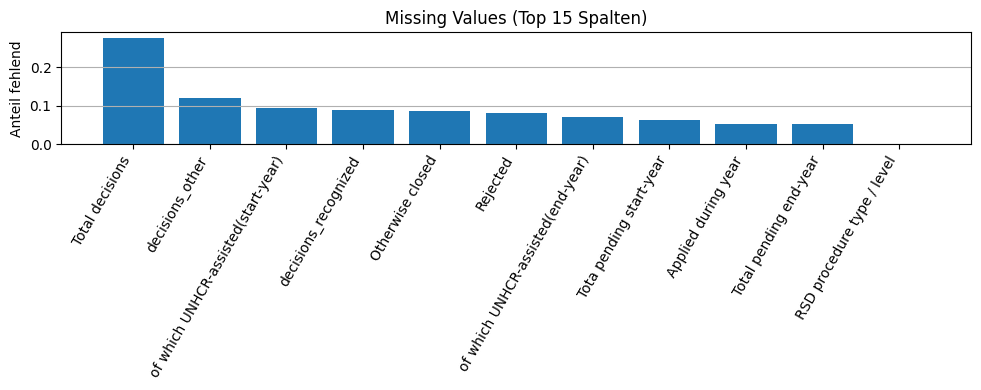

In [5]:
# Missing als Balken (Top 15)
top = missing[missing > 0].head(15)

plt.figure(figsize=(10,4))
plt.bar(top.index, top.values)
plt.xticks(rotation=60, ha='right')
plt.ylabel('Anteil fehlend')
plt.title('Missing Values (Top 15 Spalten)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Zeitabdeckung

Welche Jahre sind im Datensatz?

In [6]:
years = df['Year'].dropna().astype(int)
print("Jahre von", years.min(), "bis", years.max())
print("Anzahl unterschiedliche Jahre:", years.nunique())

Jahre von 2000 bis 2016
Anzahl unterschiedliche Jahre: 17


## Top-Aufnahmeländer nach Asylanträgen

Spalte: Country / territory of asylum/residence 

Kennzahl: Applied during year (Summe über alle Jahre)


In [7]:
dest_col = 'Country / territory of asylum/residence'

top_dest = (
    df.groupby(dest_col)['Applied during year']
      .sum(min_count=1)
      .sort_values(ascending=False)
      .head(10)
)

top_dest

Country / territory of asylum/residence
Germany                                  2332378.0
France                                   1501743.0
South Africa                             1379553.0
United States of America                 1371102.0
United Kingdom                           1138437.0
Sweden                                    805703.0
Serbia and Kosovo (S/RES/1244 (1999))     589529.0
Italy                                     511403.0
Hungary                                   492115.0
Russian Federation                        489053.0
Name: Applied during year, dtype: float64

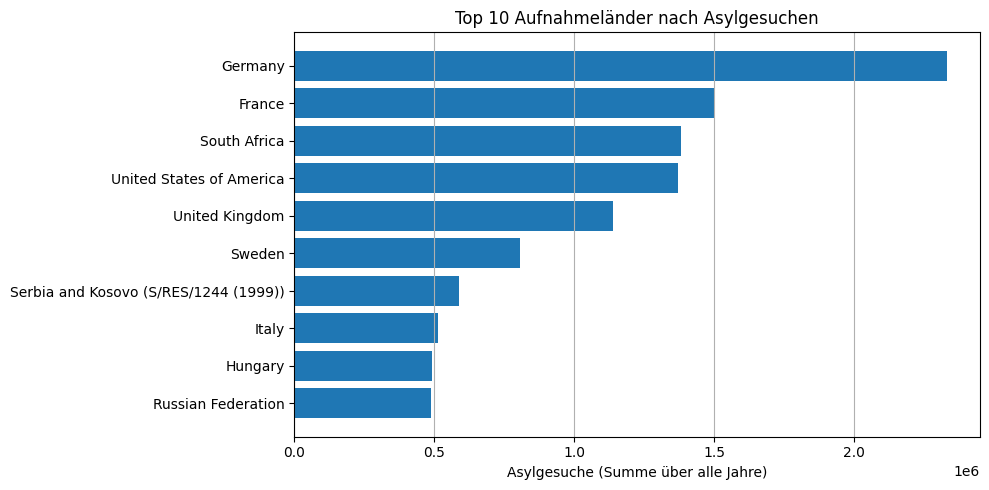

In [8]:
plt.figure(figsize=(10,5))
plt.barh(top_dest.index[::-1], top_dest.values[::-1])
plt.xlabel('Asylgesuche (Summe über alle Jahre)')
plt.title('Top 10 Aufnahmeländer nach Asylgesuchen')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## Entwicklung über die Jahre (global)

Wir summieren pro Jahr die Asylanträge über alle Länder.

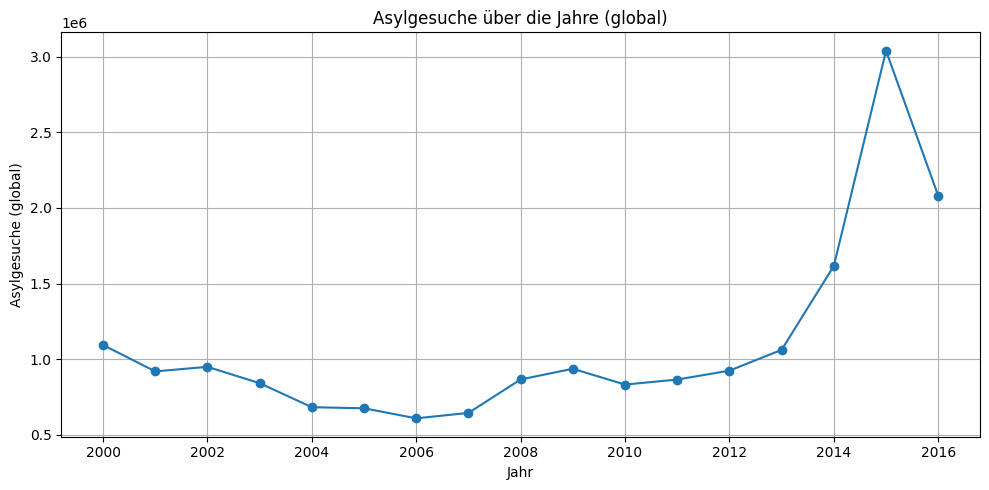

Year
2007     643465.0
2008     864942.0
2009     935603.0
2010     830964.0
2011     864232.0
2012     923155.0
2013    1061074.0
2014    1616565.0
2015    3041199.0
2016    2080600.0
Name: Applied during year, dtype: float64

In [9]:
year_applied = df.groupby('Year')['Applied during year'].sum(min_count=1)

plt.figure(figsize=(10,5))
plt.plot(year_applied.index, year_applied.values, marker='o')
plt.xlabel('Jahr')
plt.ylabel('Asylgesuche (global)')
plt.title('Asylgesuche über die Jahre (global)')
plt.grid(True)
plt.tight_layout()
plt.show()

year_applied.tail(10)

## Top-5 Länder über die Jahre 

Für die 5 Länder mit den meisten Asylgesuchen zeigen wir den Verlauf pro Jahr.

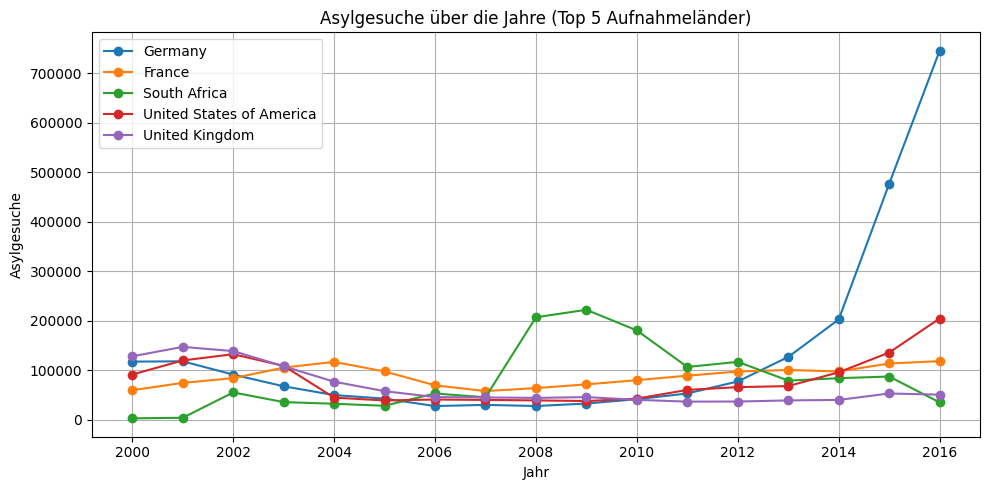

In [10]:
top5 = (
    df.groupby(dest_col)['Applied during year']
      .sum(min_count=1)
      .sort_values(ascending=False)
      .head(5)
      .index
)

tmp = df[df[dest_col].isin(top5)].copy()

year_country = (
    tmp.groupby(['Year', dest_col])['Applied during year']
       .sum(min_count=1)
       .reset_index()
)

plt.figure(figsize=(10,5))
for country in top5:
    s = year_country[year_country[dest_col] == country]
    plt.plot(s['Year'], s['Applied during year'], marker='o', label=country)

plt.xlabel('Jahr')
plt.ylabel('Asylgesuche')
plt.title('Asylgesuche über die Jahre (Top 5 Aufnahmeländer)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Entscheidungen: anerkannt vs. abgelehnt (global)

Wir vergleichen pro Jahr:
- decisions_recognized (anerkannt)
- Rejected (abgelehnt)

(Das ist eine vereinfachte Sicht es gibt noch decisions_other , Otherwise close usw.).

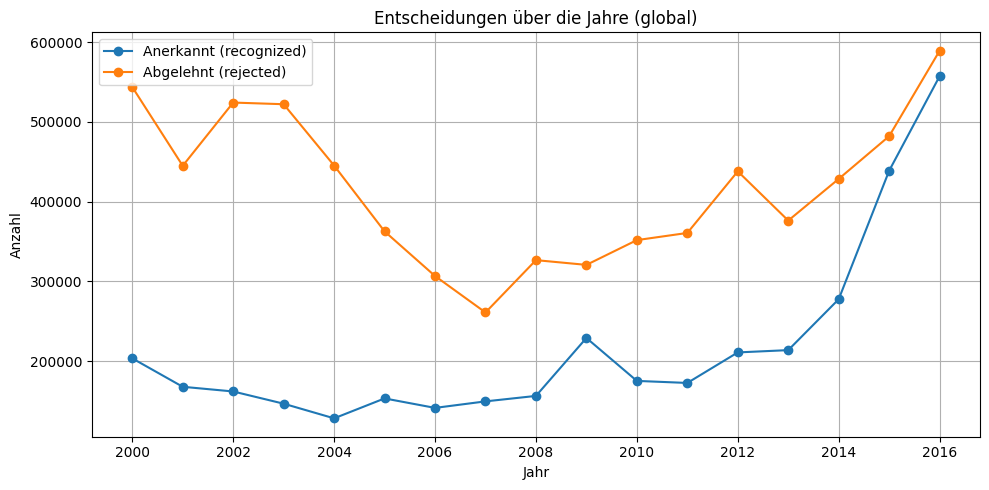

In [11]:
year_rec = df.groupby('Year')['decisions_recognized'].sum(min_count=1)
year_rej = df.groupby('Year')['Rejected'].sum(min_count=1)

plt.figure(figsize=(10,5))
plt.plot(year_rec.index, year_rec.values, marker='o', label='Anerkannt (recognized)')
plt.plot(year_rej.index, year_rej.values, marker='o', label='Abgelehnt (rejected)')
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.title('Entscheidungen über die Jahre (global)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

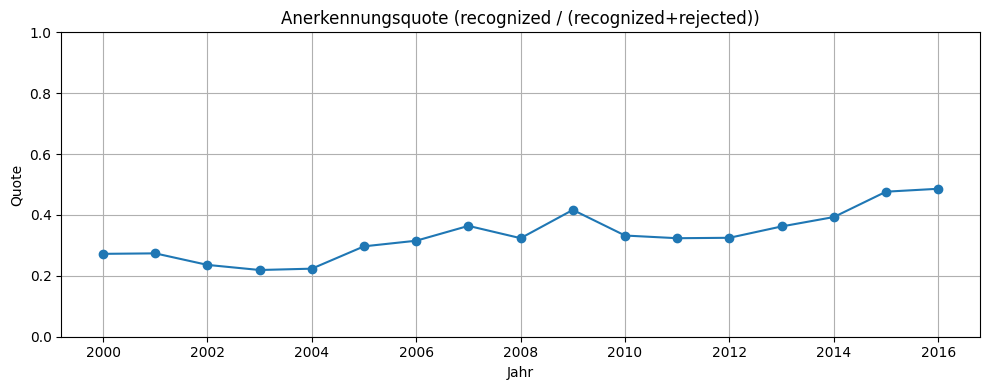

Year
2007    0.364164
2008    0.323712
2009    0.416626
2010    0.332444
2011    0.323626
2012    0.325012
2013    0.362303
2014    0.393163
2015    0.476487
2016    0.486064
dtype: float64

In [12]:
# einfache Anerkennungsquote (nur recognized / (recognized + rejected))
total_rr = (year_rec + year_rej).replace(0, np.nan)
rate = year_rec / total_rr

plt.figure(figsize=(10,4))
plt.plot(rate.index, rate.values, marker='o')
plt.ylim(0, 1)
plt.xlabel('Jahr')
plt.ylabel('Quote')
plt.title('Anerkennungsquote (recognized / (recognized+rejected))')
plt.grid(True)
plt.tight_layout()
plt.show()

rate.tail(10)

## Offene Fälle und UNHCR-assisted (global)

Wir schauen, wie viele Fälle offen sind:
- zu Jahresbeginn (Tota pending start-year)
- zu Jahresende (Total pending end-year)

Und wie gross der Anteil UNHCR-assisted ist Start/Ende.

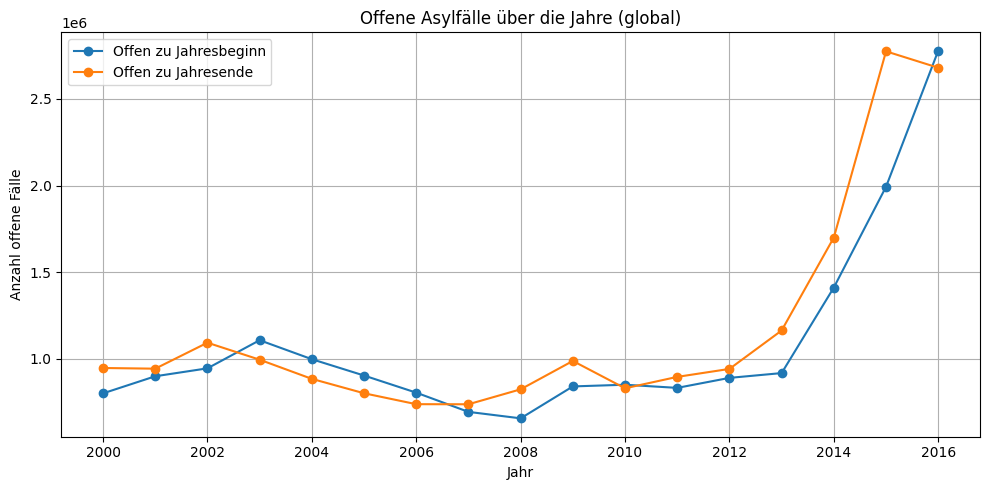

In [13]:
start_pending = df.groupby('Year')['Tota pending start-year'].sum(min_count=1)
end_pending = df.groupby('Year')['Total pending end-year'].sum(min_count=1)

plt.figure(figsize=(10,5))
plt.plot(start_pending.index, start_pending.values, marker='o', label='Offen zu Jahresbeginn')
plt.plot(end_pending.index, end_pending.values, marker='o', label='Offen zu Jahresende')
plt.xlabel('Jahr')
plt.ylabel('Anzahl offene Fälle')
plt.title('Offene Asylfälle über die Jahre (global)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

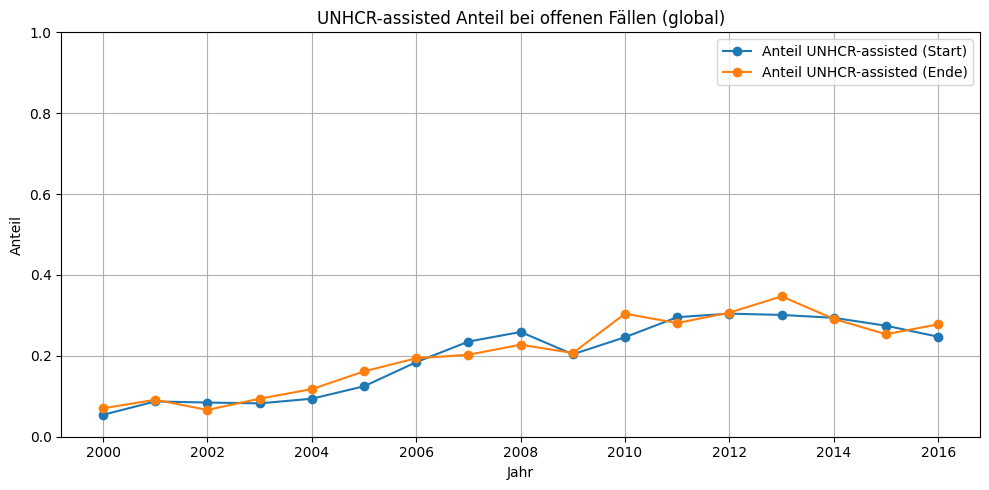

In [14]:
start_unhcr = df.groupby('Year')['of which UNHCR-assisted(start-year)'].sum(min_count=1)
end_unhcr = df.groupby('Year')['of which UNHCR-assisted(end-year)'].sum(min_count=1)

start_share = start_unhcr / start_pending.replace(0, np.nan)
end_share = end_unhcr / end_pending.replace(0, np.nan)

plt.figure(figsize=(10,5))
plt.plot(start_share.index, start_share.values, marker='o', label='Anteil UNHCR-assisted (Start)')
plt.plot(end_share.index, end_share.values, marker='o', label='Anteil UNHCR-assisted (Ende)')
plt.ylim(0, 1)
plt.xlabel('Jahr')
plt.ylabel('Anteil')
plt.title('UNHCR-assisted Anteil bei offenen Fällen (global)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## RSD procedure type / level

Kurzer Überblick: welche Verfahren/Level kommen am häufigsten vor?

In [15]:
rsd_col = 'RSD procedure type / level'

rsd_counts = df[rsd_col].value_counts(dropna=False).head(15)
rsd_counts

RSD procedure type / level
G / FI    59432
G / AR    17042
U / FI    13554
G / FA     8784
G / RA     7520
G / JR     4736
U / AR     3433
U / FA     3036
G / EO     2992
G / IN     2684
G / NA     2218
J / FI      996
U / RA      879
G / SP      694
J / FA      564
Name: count, dtype: int64

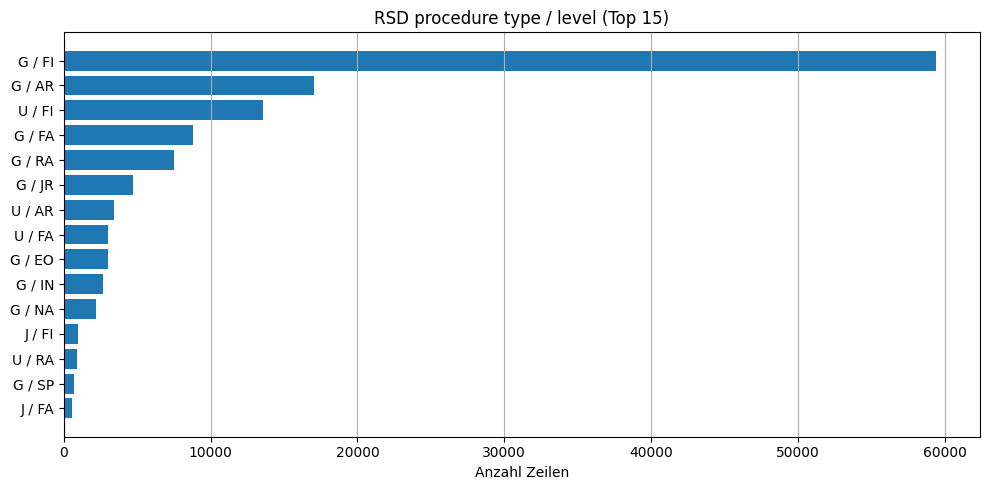

In [16]:
# Plot (Top 15)
plot_counts = rsd_counts.copy()
plot_counts.index = plot_counts.index.fillna("NaN")

plt.figure(figsize=(10,5))
plt.barh(plot_counts.index[::-1], plot_counts.values[::-1])
plt.xlabel('Anzahl Zeilen')
plt.title('RSD procedure type / level (Top 15)')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## Top-Herkunftsländer (Origin) nach Asylanträgen



In [17]:
origin_col = 'Origin'

top_orig = (
    df.groupby(origin_col)['Applied during year']
      .sum(min_count=1)
      .sort_values(ascending=False)
      .head(10)
)

top_orig

Origin
Afghanistan                              1579358.0
Syrian Arab Rep.                         1484218.0
Iraq                                     1186342.0
Various/Unknown                           924459.0
Serbia and Kosovo (S/RES/1244 (1999))     708396.0
Dem. Rep. of the Congo                    698607.0
Zimbabwe                                  657685.0
Somalia                                   615710.0
Ukraine                                   574096.0
Eritrea                                   535177.0
Name: Applied during year, dtype: float64

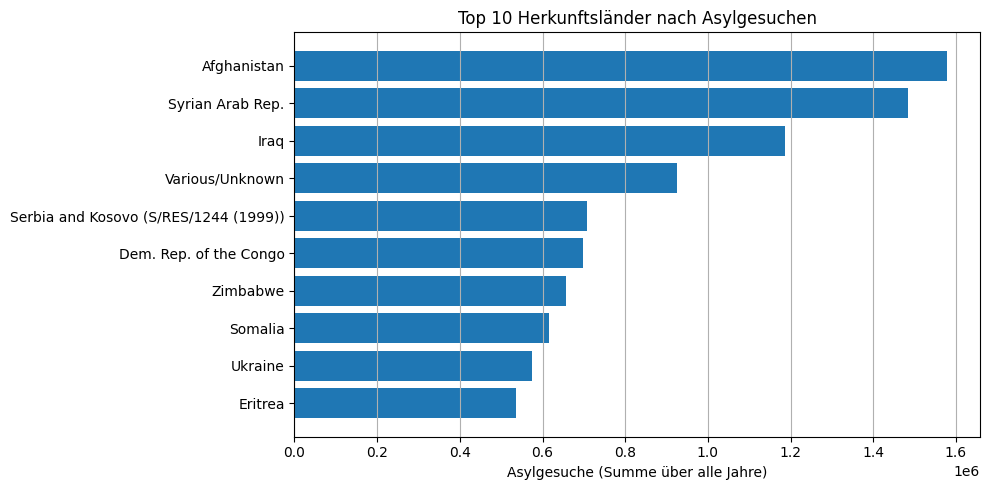

In [18]:
plt.figure(figsize=(10,5))
plt.barh(top_orig.index[::-1], top_orig.values[::-1])
plt.xlabel('Asylgesuche (Summe über alle Jahre)')
plt.title('Top 10 Herkunftsländer nach Asylgesuchen')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

## Mini-Fazit

- Der Datensatz enthält jährliche Werte zu Anträgen, Entscheidungen und pending Fällen.
- Einige Spalten haben Missing Values .
